# 토픽 모델링

* 참고 자료: [Latent Dirichlet allocation from scratch](https://www.depends-on-the-definition.com/lda-from-scratch/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

plt.style.use("ggplot")
plt.usetex = True

In [3]:
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True,
                            )
print(data[0])

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



In [4]:
n_samples = 1000

data_samples = data[:n_samples]

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=10000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)

In [11]:
vocabulary = tf_vectorizer.vocabulary_
print(f'Vocabulary size: {len(vocabulary)}')

print(type(tf))

Vocabulary size: 7358
<class 'scipy.sparse._csr.csr_matrix'>


In [19]:
test_arr = np.array([0, 1, 0, 2, 0])
test_row = np.where(test_arr != 0)
print(test_row)
print(test_row[0].tolist())

for row in tf.toarray():
    row_not_zero = np.where(row != 0)
    print(row_not_zero[0].tolist())
    break

(array([1, 3], dtype=int64),)
[1, 3]
[447, 807, 837, 872, 986, 1456, 1900, 1997, 2054, 2116, 2155, 2527, 2529, 2579, 3047, 3053, 3121, 3190, 3292, 3389, 3449, 3515, 3661, 3701, 3929, 3995, 4023, 4103, 4203, 4632, 5090, 5185, 5419, 5423, 5435, 5564, 5566, 5577, 5992, 6168, 6308, 6364, 6481, 6671, 6821, 6858, 6937, 7284]


In [20]:
docs = []
for row in tf.toarray():
    present_words = np.where(row != 0)[0].tolist()
    present_words_with_count = []
    for word_idx in present_words:
        for count in range(row[word_idx]):
            present_words_with_count.append(word_idx)
    docs.append(present_words_with_count)

In [21]:
D = len(docs)        # number of documents
V = len(vocabulary)  # size of the vocabulary 
T = 10               # number of topics

alpha = 1 / T         # the parameter of the Dirichlet prior on the per-document topic distributions
beta = 1 / T        # the parameter of the Dirichlet prior on the per-topic word distribution

In [22]:
z_d_n = [[0 for _ in range(len(d))] for d in docs]  # z_i_j
theta_d_z = np.zeros((D, T))
phi_z_w = np.zeros((T, V))
n_d = np.zeros((D))
n_z = np.zeros((T))

## Initialize the parameters
# m: doc id
for d, doc in enumerate(docs):
    # n: id of word inside document, w: id of the word globally
    for n, w in enumerate(doc):
        # assign a topic randomly to words
        z_d_n[d][n] = n % T
        # get the topic for word n in document m
        z = z_d_n[d][n]
        # keep track of our counts
        theta_d_z[d][z] += 1
        phi_z_w[z, w] += 1
        n_z[z] += 1
        n_d[d] += 1

for iteration in tqdm(range(10)):
    for d, doc in enumerate(docs):
        for n, w in enumerate(doc):
            # get the topic for word n in document m
            z = z_d_n[d][n]

            # decrement counts for word w with associated topic z
            theta_d_z[d][z] -= 1
            phi_z_w[z, w] -= 1
            n_z[z] -= 1

            # sample new topic from a multinomial according to our formula
            p_d_t = (theta_d_z[d] + alpha) / (n_d[d] - 1 + T * alpha)
            p_t_w = (phi_z_w[:, w] + beta) / (n_z + V * beta)
            p_z = p_d_t * p_t_w
            p_z /= np.sum(p_z)
            new_z = np.random.multinomial(1, p_z).argmax()

            # set z as the new topic and increment counts
            z_d_n[d][n] = new_z
            theta_d_z[d][new_z] += 1
            phi_z_w[new_z, w] += 1
            n_z[new_z] += 1

  0%|          | 0/10 [00:00<?, ?it/s]

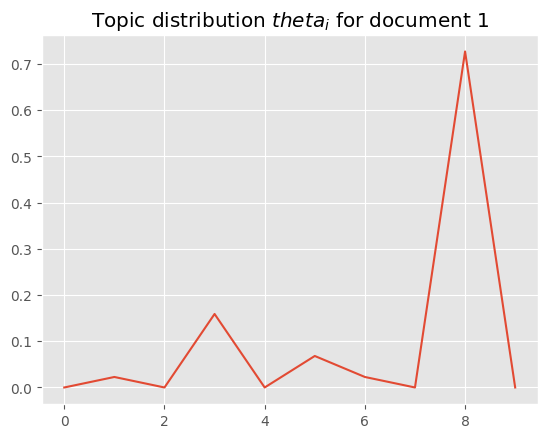

In [23]:
i = 1
plt.plot(theta_d_z[i]/ sum(theta_d_z[i]));
plt.title("Topic distribution $theta_i$ for document {}".format(i));

In [24]:
inv_vocabulary = {v: k for k, v in vocabulary.items()}
n_top_words = 10
for topic_idx, topic in enumerate(phi_z_w):
    message = "Topic #%d: " % topic_idx
    message += " ".join([inv_vocabulary[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)

Topic #0: 10 00 drive earth 15 use cost 25 software thanks
Topic #1: edu com send mail file server data software line using
Topic #2: gm better people don does know did human good want
Topic #3: section just use know license firearm long current like power
Topic #4: god people know point does did really like church jesus
Topic #5: israel game greek years make real read sure said billion
Topic #6: key new health aids information clipper state public chip government
Topic #7: graphics edu space program ftp systems support 128 3d ray
Topic #8: people make don just law space government like life does
Topic #9: just like think don good ve know people going got
